# Module 4 - Algo Trading using Classification


   ### Welcome to the Answer notebook for Module 4 ! 
Make sure that you've submitted the module 3 notebook and unlocked Module 4 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 4.1 
Import the csv file of the stock which contained the Bollinger columns as well.



In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
INFY = pd.read_csv("week3.csv")
OLD_stock = INFY.drop(['new_column'],axis=1)
OLD_stock.tail()

,Date,Symbol,Series,Date.1,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Deliverable Qty,% Dly Qt to Traded Qty,month,year,Day_Pct_Change,Trend,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower
489,2019-05-07,INFY,EQ,2019-05-07,718.40,720.40,727.90,718.7,724.40,724.55,...,3690425,64.21,5,2019,0.9,Slight Positive,729.810714,10.288365,750.387444,709.233984
490,2019-05-08,INFY,EQ,2019-05-08,724.55,721.00,726.00,716.5,718.95,719.35,...,3950857,63.24,5,2019,-0.7,Slight Negative,727.782143,9.223936,746.230016,709.334270
491,2019-05-09,INFY,EQ,2019-05-09,719.35,719.15,730.30,715.8,722.00,721.05,...,4808832,65.01,5,2019,0.2,Slight or No change,727.321429,9.398542,746.118512,708.524346
492,2019-05-10,INFY,EQ,2019-05-10,721.05,720.80,726.00,715.0,716.50,716.85,...,5545377,66.39,5,2019,-0.6,Slight Negative,726.803571,9.781625,746.366821,707.240322
493,2019-05-13,INFY,EQ,2019-05-13,716.85,716.55,726.45,712.1,718.00,719.70,...,4745909,69.70,5,2019,0.4,Slight or No change,726.992857,9.602361,746.197578,707.788136


### Query 4.1a 

Create a new column 'Call' , whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band 

>'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

>'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

>'Short' if the stock price is above the upper Bollinger band




In [3]:
def call(row):
    if row['Close Price'] <= row['14_day_bollinger_lower']: return 'Buy'    
    if row['Close Price'] >= row['14_day_bollinger_upper']: return 'Short'
    if row['Close Price'] == row['14_day_bollinger_upper']: return 'Hold'    
    if row['Close Price'] >  row['14_day_bollinger_lower'] and row['Close Price'] <  row['14_day_SMA']:  return 'Hold Buy / Liquidate Short'
    if row['Close Price'] <  row['14_day_bollinger_upper'] and row['Close Price'] >  row['14_day_SMA']:  return 'Hold Short / Liquidate Buy'

OLD_stock['Call'] = OLD_stock.apply(call, axis=1) 
OLD_stock.tail()

,Date,Symbol,Series,Date.1,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,% Dly Qt to Traded Qty,month,year,Day_Pct_Change,Trend,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower,Call
489,2019-05-07,INFY,EQ,2019-05-07,718.40,720.40,727.90,718.7,724.40,724.55,...,64.21,5,2019,0.9,Slight Positive,729.810714,10.288365,750.387444,709.233984,Hold Buy / Liquidate Short
490,2019-05-08,INFY,EQ,2019-05-08,724.55,721.00,726.00,716.5,718.95,719.35,...,63.24,5,2019,-0.7,Slight Negative,727.782143,9.223936,746.230016,709.334270,Hold Buy / Liquidate Short
491,2019-05-09,INFY,EQ,2019-05-09,719.35,719.15,730.30,715.8,722.00,721.05,...,65.01,5,2019,0.2,Slight or No change,727.321429,9.398542,746.118512,708.524346,Hold Buy / Liquidate Short
492,2019-05-10,INFY,EQ,2019-05-10,721.05,720.80,726.00,715.0,716.50,716.85,...,66.39,5,2019,-0.6,Slight Negative,726.803571,9.781625,746.366821,707.240322,Hold Buy / Liquidate Short
493,2019-05-13,INFY,EQ,2019-05-13,716.85,716.55,726.45,712.1,718.00,719.70,...,69.70,5,2019,0.4,Slight or No change,726.992857,9.602361,746.197578,707.788136,Hold Buy / Liquidate Short


### Query 4.1b

>Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


x = OLD_stock.dropna()[['Close Price', '14_day_SMA', '14_day_bollinger_upper', '14_day_bollinger_lower']]
y = OLD_stock.dropna()['Call']

scaler = StandardScaler()
x = scaler.fit_transform(x)


X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)


max_features = len(y.unique())
encoder      = LabelEncoder()

print(X_train.shape)

print(X_test.shape)


(336, 4)
(145, 4)


In [5]:
classifiers = [
    KNeighborsClassifier(max_features),
    SVC(kernel="rbf", gamma = 2 , C=0.025, probability=True),
    SVC(kernel="linear", C=0.025,probability=True ),
    DecisionTreeClassifier(max_depth=7, random_state=3,max_features=max_features),
    RandomForestClassifier(max_depth=7, n_estimators=20, max_features=max_features),
    AdaBoostClassifier(),
    MLPClassifier(activation='relu',alpha=0.5, max_iter=500, solver='lbfgs'),
    GradientBoostingClassifier(max_features = max_features),
    GaussianProcessClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, Y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    
    print('**Results**')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
    
print("="*30)

KNeighborsClassifier
**Results**
Accuracy: 85.5172%
Log Loss: 1.9207320496667433
SVC
**Results**
Accuracy: 48.2759%
Log Loss: 0.7776265133442865
SVC
**Results**
Accuracy: 52.4138%
Log Loss: 0.7004418743660152
DecisionTreeClassifier
**Results**
Accuracy: 74.4828%
Log Loss: 5.277699574238464
RandomForestClassifier
**Results**
Accuracy: 81.3793%
Log Loss: 0.5979928932664489
AdaBoostClassifier
**Results**
Accuracy: 50.3448%
Log Loss: 1.2062724324430036
MLPClassifier
**Results**
Accuracy: 93.7931%
Log Loss: 0.25833839340976356
GradientBoostingClassifier
**Results**
Accuracy: 83.4483%
Log Loss: 0.5256309506078434
GaussianProcessClassifier
**Results**
Accuracy: 63.4483%
Log Loss: 0.9151630091346493
GaussianNB
**Results**
Accuracy: 51.7241%
Log Loss: 1.3283621448439902
LinearDiscriminantAnalysis
**Results**
Accuracy: 77.2414%
Log Loss: 0.6710912284659384
QuadraticDiscriminantAnalysis
**Results**
Accuracy: 78.6207%
Log Loss: 0.8624132727120847


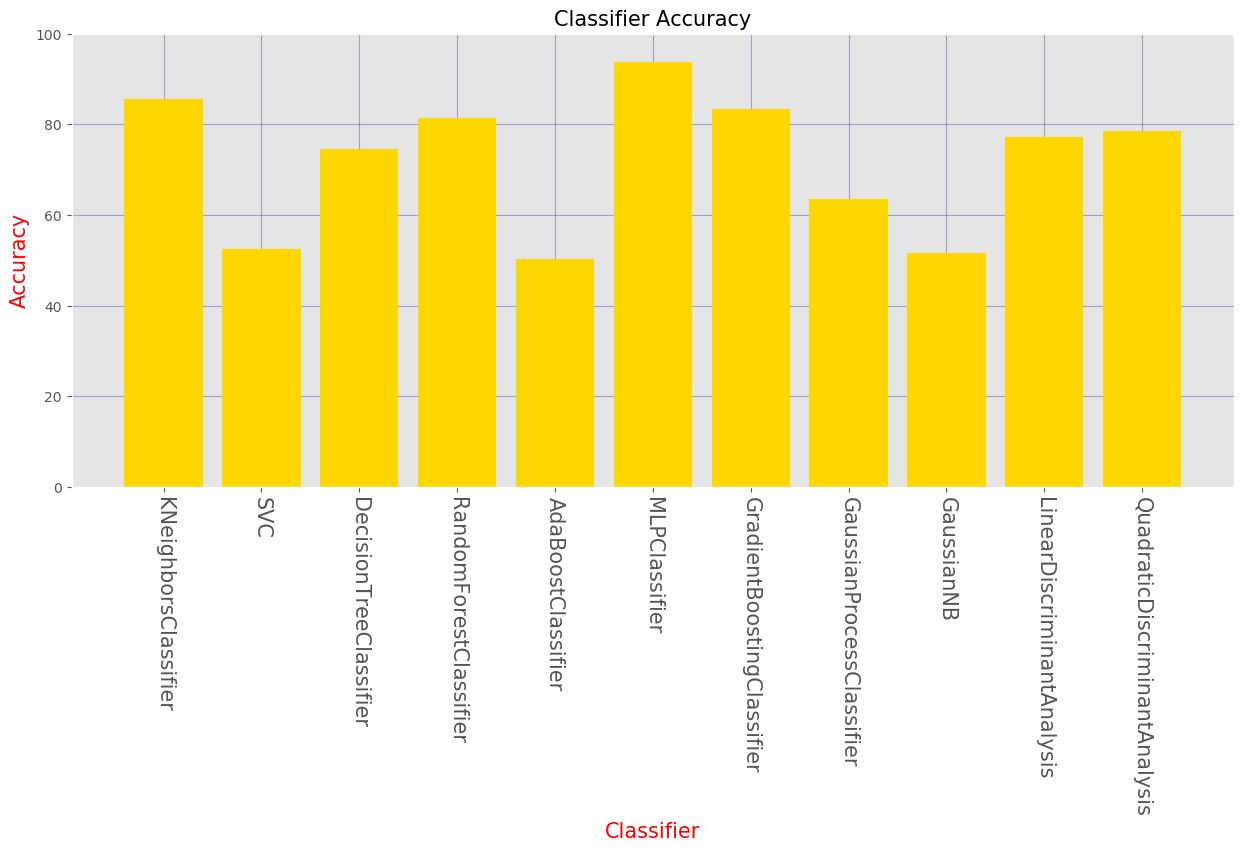

In [6]:
plt.figure(figsize = (15,6), dpi = 100)
plt.style.use('ggplot')
plt.grid(color = 'darkblue', alpha = 0.3)
plt.xlabel('Classifier',size = 15, color='red')
plt.ylabel('Accuracy',size = 15, color='red')
plt.xticks(rotation=270, size = 15)
plt.ylim(0,100)
plt.title('Classifier Accuracy',size = 15, color='black')
plt.bar(log['Classifier'],log['Accuracy'],color='gold')
plt.show()

### Query 4.1c

>Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [7]:
AXISBANK_small_cap = pd.read_csv("AXISBANK.csv",parse_dates=['Date'])
new_stock = AXISBANK_small_cap[ AXISBANK_small_cap.Series == 'EQ' ]
new_stock.set_index('Date', drop=False, inplace=True)

new_stock["14_day_SMA"] = new_stock["Close Price"].rolling(14).mean()
new_stock["14_day_STD"] = new_stock["Close Price"].rolling(14).std()
new_stock["14_day_bollinger_upper"] = new_stock["14_day_SMA"] + new_stock["14_day_STD"] * 2
new_stock["14_day_bollinger_lower"] = new_stock["14_day_SMA"] - new_stock["14_day_STD"] * 2


In [8]:
new_stock = new_stock.dropna()


new_stock_x = scaler.fit_transform( new_stock[['Close Price', '14_day_SMA', '14_day_bollinger_upper', '14_day_bollinger_lower']] )
new_stock['Call']      = classifiers[6].predict( new_stock_x ) # # using previously trained MLPClasifier
new_stock['Call_Code'] = encoder.fit(new_stock['Call']).transform(new_stock['Call'])
print( "Call_unique_Name = ", new_stock['Call'].unique() )
new_stock.tail()

#NOTES:
#MLPClassifier() = ('Neural Net', 93.7931%) was the top performing Classification Algo.


Call_unique_Name =  ['Hold Short / Liquidate Buy' 'Short' 'Hold Buy / Liquidate Short' 'Buy']


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower,Call,Call_Code
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-07,AXISBANK,EQ,2019-05-07,747.45,751.85,755.50,740.00,744.85,741.85,748.48,...,3.796226e+09,141094,2404026,47.40,756.978571,9.724290,776.427151,737.529992,Buy,0
2019-05-08,AXISBANK,EQ,2019-05-08,741.85,741.90,744.75,733.35,735.10,735.50,737.58,...,4.971211e+09,118950,3373685,50.06,754.917857,11.013429,776.944715,732.890999,Buy,0
2019-05-09,AXISBANK,EQ,2019-05-09,735.50,733.90,740.50,729.40,732.35,731.00,734.60,...,3.080497e+09,75621,1409191,33.60,752.642857,12.445355,777.533568,727.752147,Buy,0
2019-05-10,AXISBANK,EQ,2019-05-10,731.00,734.40,738.50,729.50,732.55,735.05,735.71,...,2.879428e+09,114875,1569735,40.11,750.067857,12.056097,774.180050,725.955664,Buy,0
2019-05-13,AXISBANK,EQ,2019-05-13,735.05,734.00,742.85,730.00,732.00,732.10,736.74,...,4.340174e+09,142075,2615724,44.40,747.275000,11.288588,769.852175,724.697825,Buy,0


## Query 4.2

Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.

>Import the stock data file of your choice


In [9]:
week_2_stcok = pd.read_csv("week2.csv")
INFY_stcok =week_2_stcok.drop(['new_column'],axis=1)
INFY_stcok['Date'] = INFY_stcok['Date'].astype('datetime64')
INFY_stcok.set_index('Date',inplace = True)
INFY_stcok.head(10)

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month,year,Day_Pct_Change,Trend
Date,,,,,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,964.25,963.50,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,5,2017,0.0,Slight or No change
2017-05-16,INFY,EQ,951.55,953.10,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,5,2017,0.4,Slight or No change
2017-05-17,INFY,EQ,955.00,951.60,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,5,2017,-0.2,Slight or No change
2017-05-18,INFY,EQ,952.80,943.00,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,5,2017,0.9,Slight Positive
2017-05-19,INFY,EQ,961.75,961.50,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,5,2017,-0.4,Slight or No change
2017-05-22,INFY,EQ,957.95,958.40,966.90,956.55,960.00,961.45,962.29,2751526,2.647755e+09,99616,2034031,73.92,5,2017,0.4,Slight or No change
2017-05-23,INFY,EQ,961.45,964.65,967.00,954.10,957.50,957.30,960.16,2019991,1.939515e+09,80122,1436389,71.11,5,2017,-0.4,Slight or No change
2017-05-24,INFY,EQ,957.30,960.00,965.50,949.60,957.00,954.80,958.37,2818143,2.700827e+09,56898,1913750,67.91,5,2017,-0.3,Slight or No change
2017-05-25,INFY,EQ,954.80,961.00,986.60,961.00,981.00,983.30,978.16,5219257,5.105250e+09,76160,4108984,78.73,5,2017,3.0,Positive


#### Define 4 new columns , whose values are:

>% change between Open and Close price for the day

>% change between Low and High price for the day

>5 day rolling mean of the day to day % change in Close Price

>5 day rolling std of the day to day % change in Close Price


In [10]:
INFY_stcok['pc_Open_Close'] = ( INFY_stcok['Close Price'] - INFY_stcok['Open Price'] ) / INFY_stcok['Open Price']
INFY_stcok['pc_High_Low']   = ( INFY_stcok['High Price']  - INFY_stcok['Low Price']  ) / INFY_stcok['Low Price']
INFY_stcok['5_day_mean']    = INFY_stcok['Day_Pct_Change'].rolling(5).mean()
INFY_stcok['5_day_std']     = INFY_stcok['Day_Pct_Change'].rolling(5).std()
INFY_stcok.dropna(inplace=True)
INFY_stcok.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,Deliverable Qty,% Dly Qt to Traded Qty,month,year,Day_Pct_Change,Trend,pc_Open_Close,pc_High_Low,5_day_mean,5_day_std
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-19,INFY,EQ,961.75,961.50,962.7,947.85,957.4,957.95,954.18,2128698,...,1457747,68.48,5,2017,-0.4,Slight or No change,-0.003692,0.015667,0.14,0.517687
2017-05-22,INFY,EQ,957.95,958.40,966.9,956.55,960.0,961.45,962.29,2751526,...,2034031,73.92,5,2017,0.4,Slight or No change,0.003182,0.010820,0.22,0.521536
2017-05-23,INFY,EQ,961.45,964.65,967.0,954.10,957.5,957.30,960.16,2019991,...,1436389,71.11,5,2017,-0.4,Slight or No change,-0.007619,0.013521,0.06,0.572713
2017-05-24,INFY,EQ,957.30,960.00,965.5,949.60,957.0,954.80,958.37,2818143,...,1913750,67.91,5,2017,-0.3,Slight or No change,-0.005417,0.016744,0.04,0.585662
2017-05-25,INFY,EQ,954.80,961.00,986.6,961.00,981.0,983.30,978.16,5219257,...,4108984,78.73,5,2017,3.0,Positive,0.023205,0.026639,0.46,1.458767


#### Create a new column 'Action' whose values are:

>1 if next day's price(Close) is greater than present day's.

>(-1) if next day's price(Close) is less than present day's.

>i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ]

>i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]


In [11]:
INFY_stcok['Action'] = np.nan

for i in range(len(INFY_stcok)-1):
    if INFY_stcok['Close Price'][i] <= INFY_stcok['Close Price'][i+1]:
        INFY_stcok['Action'][i] = 1
    elif INFY_stcok['Close Price'][i] > INFY_stcok['Close Price'][i+1]:
        INFY_stcok['Action'][i] = -1

INFY_stcok = INFY_stcok.dropna()
INFY_stcok.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,% Dly Qt to Traded Qty,month,year,Day_Pct_Change,Trend,pc_Open_Close,pc_High_Low,5_day_mean,5_day_std,Action
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-19,INFY,EQ,961.75,961.50,962.7,947.85,957.4,957.95,954.18,2128698,...,68.48,5,2017,-0.4,Slight or No change,-0.003692,0.015667,0.14,0.517687,1.0
2017-05-22,INFY,EQ,957.95,958.40,966.9,956.55,960.0,961.45,962.29,2751526,...,73.92,5,2017,0.4,Slight or No change,0.003182,0.010820,0.22,0.521536,-1.0
2017-05-23,INFY,EQ,961.45,964.65,967.0,954.10,957.5,957.30,960.16,2019991,...,71.11,5,2017,-0.4,Slight or No change,-0.007619,0.013521,0.06,0.572713,-1.0
2017-05-24,INFY,EQ,957.30,960.00,965.5,949.60,957.0,954.80,958.37,2818143,...,67.91,5,2017,-0.3,Slight or No change,-0.005417,0.016744,0.04,0.585662,1.0
2017-05-25,INFY,EQ,954.80,961.00,986.6,961.00,981.0,983.30,978.16,5219257,...,78.73,5,2017,3.0,Positive,0.023205,0.026639,0.46,1.458767,1.0


>Construct a classification model with the 4 new inputs and 'Action' as target

>Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

In [12]:
X = INFY_stcok.dropna()[['pc_Open_Close', 'pc_High_Low', '5_day_mean', '5_day_std']]
y = INFY_stcok.dropna()['Action']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=150)

random_forest = RandomForestClassifier(n_estimators=200, max_features=2)
random_forest.fit(X_train,  y_train)
Score = random_forest.score(X_test, y_test)

print("The accuracy of the random_forest Classifier is :" +str(Score*100))

The accuracy of the random_forest Classifier is :51.85185185185185


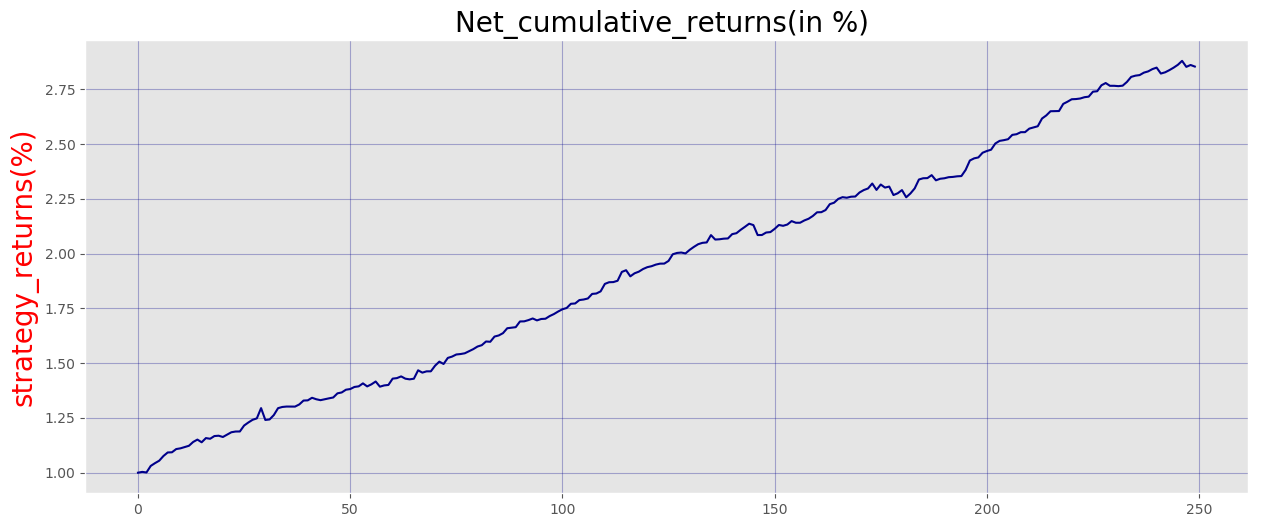

In [14]:
pridicted_Y = random_forest.predict(X)[:-1].astype('int')
pridicted_Y = np.hstack((1, pridicted_Y))

raw = np.array([i*j for i, j in zip(pridicted_Y, INFY_stcok['Close Price'])])

net = [1, ]

for i in range(1, len(pridicted_Y)):
    if pridicted_Y[i] < 1:
        continue
    else:
        profit = (INFY_stcok['Close Price'][i] - abs(INFY_stcok['Close Price'][i-1])) / abs(INFY_stcok['Close Price'][i-1])
        net.append(profit)

cumulative_returns = []
for i in range(1, len(net)):
    cumulative_returns.append(np.sum(net[:i]))

fig, ax  = plt.subplots(figsize=(15, 6), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)
plt.ylabel('strategy_returns(%)', size = 20, color='red')
plt.title('Net_cumulative_returns(in %) ', size = 20, color='black')
ax.plot(range(len(cumulative_returns)), cumulative_returns, color = 'darkblue')
plt.show()